## 欠損値の処理

In [7]:
from modules.constants import local_paths
from modules import predict
import os
import numpy as np
import pandas as pd
import pickle

%load_ext autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
%autoreload

In [22]:
df = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features_20_to_21.csv'), index_col=0,  sep="\t", 
                 dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})

In [23]:
df.drop(columns=['owner_id'], inplace=True, errors='ignore')

In [24]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank', 'frame',
       'number', 'sex', 'age', 'impost',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=205)

In [25]:
df

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,15.0,1,1,0,3,56.0,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,6.0,1,2,1,3,54.0,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,10.0,2,3,1,3,52.0,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,12.0,2,4,0,3,56.0,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,5.0,3,5,1,3,54.0,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,2.0,6,11,0,3,54.0,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,9.0,7,12,1,3,51.0,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,15.0,7,13,1,3,52.0,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,12.0,8,14,0,4,57.0,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [26]:
df.dropna()

,race_id,horse_id,jockey_id,trainer_id,rank,frame,number,sex,age,impost,...,jockey_dirt_win_sum_last_two_years,jockey_win_proba_mean_last_two_years,jockey_win_proba_max_last_two_years,jockey_top_2_proba_mean_last_two_years,jockey_top_2_proba_max_last_two_years,jockey_top_3_proba_mean_last_two_years,jockey_top_3_proba_max_last_two_years,jockey_earned_prize_mean_last_two_years,jockey_earned_prize_max_last_two_years,jockey_earned_prize_sum_last_two_years
0,202101010101,2018104780,01144,01136,15.0,1,1,0,3,56.0,...,28.0,0.0,0.0,0.1325,0.149,0.1920,0.211,60291.30,69338.7,120582.6
1,202101010101,2018100570,00666,01039,6.0,1,2,1,3,54.0,...,104.0,0.0,0.0,0.3150,0.327,0.4120,0.417,231707.70,232931.3,463415.4
2,202101010101,2018101518,01173,01093,10.0,2,3,1,3,52.0,...,17.0,0.0,0.0,0.0525,0.059,0.0930,0.101,19622.50,25462.0,39245.0
3,202101010101,2018101447,01091,01076,12.0,2,4,0,3,56.0,...,16.0,0.0,0.0,0.1040,0.111,0.1790,0.186,63576.30,65813.8,127152.6
4,202101010101,2018101539,01015,00417,5.0,3,5,1,3,54.0,...,22.0,0.0,0.0,0.1220,0.131,0.1765,0.182,48988.85,53312.8,97977.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,202010020812,2017106438,01152,01098,2.0,6,11,0,3,54.0,...,16.0,0.0,0.0,0.0805,0.089,0.1200,0.130,25200.05,33128.0,50400.1
47872,202010020812,2017103149,01168,01039,9.0,7,12,1,3,51.0,...,28.0,0.0,0.0,0.0785,0.100,0.1375,0.154,27746.95,42461.5,55493.9
47873,202010020812,2017105123,01166,01087,15.0,7,13,1,3,52.0,...,34.0,0.0,0.0,0.1130,0.125,0.1895,0.198,49791.85,55710.9,99583.7
47874,202010020812,2016110126,01115,01022,12.0,8,14,0,4,57.0,...,49.0,0.0,0.0,0.2110,0.215,0.3135,0.319,129619.45,131236.6,259238.9


In [27]:
returns = pd.read_csv(os.path.join(local_paths.COMPLETED_DIR, 'returns_22_to_23.csv'), index_col=0 ,sep="\t")
returns

,race_id,単勝_rank,単勝_returns,複勝_rank,複勝_returns,枠連_rank,枠連_returns,馬連_rank,馬連_returns,ワイド_rank,ワイド_returns,馬単_rank,馬単_returns,三連複_rank,三連複_returns,三連単_rank,三連単_returns
0,202206010101,[15],[680],"[15, 10, 4]","[210, 1600, 170]","[5, 8]",[2680],"[10, 15]",[31040],"[10, 15, 4, 15, 4, 10]","[6890, 660, 5640]","[15, 10]",[46070],"[4, 10, 15]",[46240],"[15, 10, 4]",[338400]
1,202206010102,[1],[1510],"[1, 8, 10]","[280, 110, 220]","[1, 4]",[860],"[1, 8]",[1060],"[1, 8, 1, 10, 8, 10]","[520, 1710, 350]","[1, 8]",[3510],"[1, 8, 10]",[2650],"[1, 8, 10]",[21660]
2,202206010103,[5],[430],"[5, 7, 11]","[130, 2620, 110]","[3, 4]",[2750],"[5, 7]",[63780],"[5, 7, 5, 11, 7, 11]","[11540, 180, 8280]","[5, 7]",[82850],"[5, 7, 11]",[24950],"[5, 7, 11]",[224010]
3,202206010104,[5],[630],"[5, 6, 10]","[190, 120, 450]","[5, 6]",[520],"[5, 6]",[580],"[5, 6, 5, 10, 6, 10]","[320, 2520, 1010]","[5, 6]",[1570],"[5, 6, 10]",[5090],"[5, 6, 10]",[24170]
4,202206010105,[8],[190],"[8, 6, 9]","[110, 110, 140]","[6, 8]",[190],"[6, 8]",[240],"[6, 8, 8, 9, 6, 9]","[140, 210, 260]","[8, 6]",[440],"[6, 8, 9]",[320],"[8, 6, 9]",[1210]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,202309050908,[8],[270],"[8, 14, 3]","[160, 170, 650]","[5, 8]",[520],"[8, 14]",[840],"[8, 14, 3, 8, 3, 14]","[440, 1960, 3500]","[8, 14]",[1490],"[3, 8, 14]",[12740],"[8, 14, 3]",[35560]
3452,202309050909,[16],[350],"[16, 9, 14]","[200, 1410, 460]","[5, 8]",[1970],"[9, 16]",[12570],"[9, 16, 14, 16, 9, 14]","[3580, 1190, 6950]","[16, 9]",[15500],"[9, 14, 16]",[46670],"[16, 9, 14]",[144610]
3453,202309050910,[11],[1710],"[11, 6, 9]","[390, 200, 190]","[6, 8]",[630],"[6, 11]",[3770],"[6, 11, 9, 11, 6, 9]","[1160, 1600, 630]","[11, 6]",[8960],"[6, 9, 11]",[7020],"[11, 6, 9]",[68800]
3454,202309050911,[15],[610],"[15, 10, 5]","[170, 110, 170]","[6, 8]",[430],"[10, 15]",[500],"[10, 15, 5, 15, 5, 10]","[290, 720, 280]","[15, 10]",[1410],"[5, 10, 15]",[1420],"[15, 10, 5]",[8900]


In [40]:
df_22_23 = pd.read_csv(os.path.join(local_paths.FEATURES_DIR, 'features.csv'), 
                    index_col=0,  sep="\t", dtype={'jockey_id': str, 'trainer_id': str, 'owner_id': str})
df_22_23.drop(columns=['owner_id'], inplace=True, errors='ignore')
df_22_23.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank', 'frame',
       'number', 'sex', 'age', 'impost',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=205)

In [41]:
with open(os.path.join(local_paths.MODELS_DIR, '2022_model_1_1.pickle'), mode='rb') as f:
  model = pickle.load(f)

## RFmodel

In [42]:
%autoreload

In [43]:
rf = predict.RFModel(
  train_df=df, returns_df=returns, bet_type='sanrentan', threshold=0.6, max_bet=1000, pivot_horse=True, stochastic_variation=False)
pred_df = rf.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[7926 1964]
 [1351 1518]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      9890
           1       0.44      0.53      0.48      2869

    accuracy                           0.74     12759
   macro avg       0.65      0.67      0.65     12759
weighted avg       0.76      0.74      0.75     12759

Accuracy: 0.7401833999529743
Selected Feature Importance:
                                      feature  importance
80       rank_mean_in_mode_course_len_past_5    0.023906
33                          rank_mean_past_5    0.020070
89      prize_mean_in_mode_course_len_past_5    0.019926
90       prize_sum_in_mode_course_len_past_5    0.019233
43                         prize_mean_past_5    0.018329
44                          prize_sum_past_5    0.016142
84  rank_diff_mean_in_mode_course_len_past_5    0.014676
68              rank_mean_in_mode_course_len    0.013640
17                             

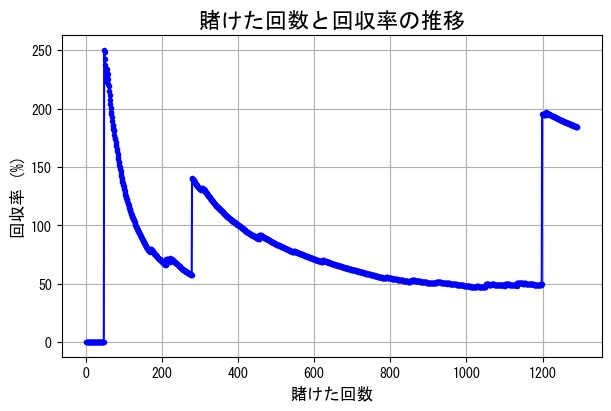

総払い戻し金額: 1227940.0円
賭けた回数: 1291回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,200,200,0.0,0.000000,-200.0
1,202201010202,0.0,600,800,0.0,0.000000,-800.0
2,202201010204,0.0,600,1400,0.0,0.000000,-1400.0
3,202201010309,0.0,600,2000,0.0,0.000000,-2000.0
4,202201010310,0.0,600,2600,0.0,0.000000,-2600.0
...,...,...,...,...,...,...,...
1286,202310030502,0.0,600,664600,1227940.0,1.847638,563340.0
1287,202310030508,0.0,600,665200,1227940.0,1.845971,562740.0
1288,202310030604,0.0,600,665800,1227940.0,1.844308,562140.0
1289,202310030606,0.0,200,666000,1227940.0,1.843754,561940.0


In [44]:
rf.plot_returns_rate(df_22_23)

In [45]:
rf_returns = rf.calc_returns_rate(df_22_23)
rf_returns

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010103,0.0,200,200,0.0,0.000000,-200.0
1,202201010202,0.0,600,800,0.0,0.000000,-800.0
2,202201010204,0.0,600,1400,0.0,0.000000,-1400.0
3,202201010309,0.0,600,2000,0.0,0.000000,-2000.0
4,202201010310,0.0,600,2600,0.0,0.000000,-2600.0
...,...,...,...,...,...,...,...
1286,202310030502,0.0,600,664600,1227940.0,1.847638,563340.0
1287,202310030508,0.0,600,665200,1227940.0,1.845971,562740.0
1288,202310030604,0.0,600,665800,1227940.0,1.844308,562140.0
1289,202310030606,0.0,200,666000,1227940.0,1.843754,561940.0


In [46]:
rf_returns[rf_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
47,202202010509,63090.0,600,25200,63090.0,2.503571,37890.0
52,202202010803,1450.0,600,27800,64540.0,2.321583,36740.0
55,202203010106,4770.0,600,29600,69310.0,2.341554,39710.0
168,202205010405,3090.0,600,90200,72400.0,0.802661,-17800.0
193,202205020805,390.0,200,102000,72790.0,0.713627,-29210.0
210,202205030504,5890.0,600,110600,78680.0,0.711392,-31920.0
220,202205030809,3870.0,200,115000,82550.0,0.717826,-32450.0
278,202206020602,119640.0,200,143800,202190.0,1.406050,58390.0
303,202206030602,3790.0,200,155600,205980.0,1.323779,50380.0
308,202206030704,1370.0,600,157800,207350.0,1.314005,49550.0


In [47]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202201010606)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
783,202201010606,1.0,0.87,1
784,202201010606,2.0,0.71,1
789,202201010606,12.0,0.60,1
790,202201010606,6.0,0.71,1
793,202201010606,3.0,0.76,1


## NNmodel

In [48]:
%autoreload

In [49]:
nn = predict.NNModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = nn.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6273 3617]
 [ 890 1979]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.63      0.74      9890
           1       0.35      0.69      0.47      2869

    accuracy                           0.65     12759
   macro avg       0.61      0.66      0.60     12759
weighted avg       0.76      0.65      0.68     12759

Accuracy: 0.6467591504036366
predicted_target
0    28991
1    22504
Name: count, dtype: int64
            race_id  horse_id  jockey_id  trainer_id  rank  frame  number  \
1      202201010101      9390         37          11   4.0      2       2   
3      202201010101      7667         75          19   5.0      4       4   
6      202201010102      3823        130         146   5.0      2       2   
7      202201010102      5378        108         154   1.0      3       3   
8      202201010102      4074         40         161   3.0      4       4   
...             ...       ...        ...       

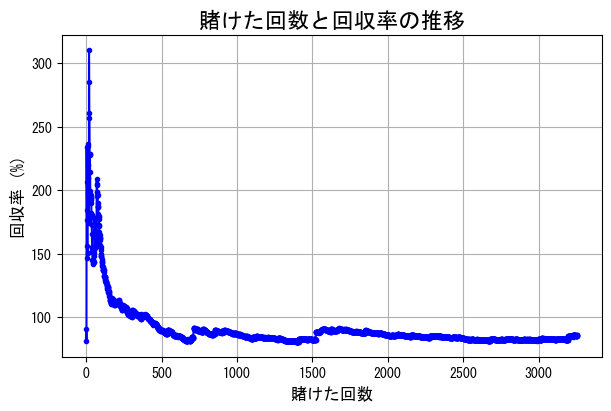

総払い戻し金額: 3411150.0円
賭けた回数: 3256回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,3500,3500,3170.0,0.905714,-330.0
1,202201010103,0.0,400,3900,3170.0,0.812821,-730.0
2,202201010104,14140.0,3500,7400,17310.0,2.339189,9910.0
3,202201010106,0.0,1000,8400,17310.0,2.060714,8910.0
4,202201010107,0.0,1000,9400,17310.0,1.841489,7910.0
...,...,...,...,...,...,...,...
3251,202310030802,0.0,400,3973000,3392500.0,0.853889,-580500.0
3252,202310030803,0.0,100,3973100,3392500.0,0.853867,-580600.0
3253,202310030804,18650.0,2000,3975100,3411150.0,0.858129,-563950.0
3254,202310030808,0.0,100,3975200,3411150.0,0.858108,-564050.0


In [50]:
nn.plot_returns_rate(df_22_23)

## LGBmodel

In [51]:
%autoreload

In [52]:
lgb = predict.LGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = lgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036793 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28558
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 194
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 11526, number of negative: 11526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5697
[LightGBM] [Info] Number of data points in the train set: 23052, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Confusion Matrix:
 [[6860 3030]
 [ 849 2020]]
Classification Report:
               precision    recall  f1-score   supp

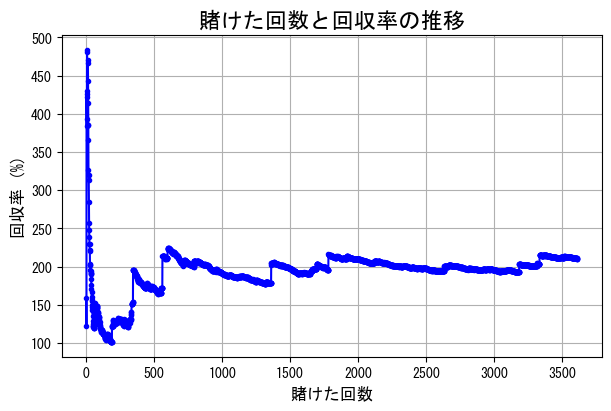

総払い戻し金額: 8131990.0円
賭けた回数: 3611回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,2000,2000,3170.0,1.585000,1170.0
1,202201010103,0.0,600,2600,3170.0,1.219231,570.0
2,202201010104,14140.0,1500,4100,17310.0,4.221951,13210.0
3,202201010106,0.0,300,4400,17310.0,3.934091,12910.0
4,202201010107,0.0,100,4500,17310.0,3.846667,12810.0
...,...,...,...,...,...,...,...
3606,202310030802,0.0,1000,3857700,8131990.0,2.107989,4274290.0
3607,202310030803,0.0,2000,3859700,8131990.0,2.106897,4272290.0
3608,202310030807,0.0,2800,3862500,8131990.0,2.105370,4269490.0
3609,202310030808,0.0,2000,3864500,8131990.0,2.104280,4267490.0


In [53]:
lgb.plot_returns_rate(df_22_23)

## XGBmodel

In [54]:
%autoreload

In [55]:
xgb = predict.XGBModel(train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.5, stochastic_variation=False)
pred_df = xgb.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())
print(pred_df)

Confusion Matrix:
 [[6860 3030]
 [ 856 2013]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78      9890
           1       0.40      0.70      0.51      2869

    accuracy                           0.70     12759
   macro avg       0.64      0.70      0.64     12759
weighted avg       0.78      0.70      0.72     12759

Accuracy: 0.6954306763852967
Selected Feature Importance:
                                       feature  importance
80        rank_mean_in_mode_course_len_past_5    0.083024
33                           rank_mean_past_5    0.035625
81         rank_min_in_mode_course_len_past_5    0.020147
43                          prize_mean_past_5    0.017519
18                                   rank_min    0.014717
195     jockey_top_3_proba_max_last_two_years    0.013843
156              jockey_top_3_proba_last_year    0.013710
146               jockey_stakes_win_last_year    0.012446
34                    

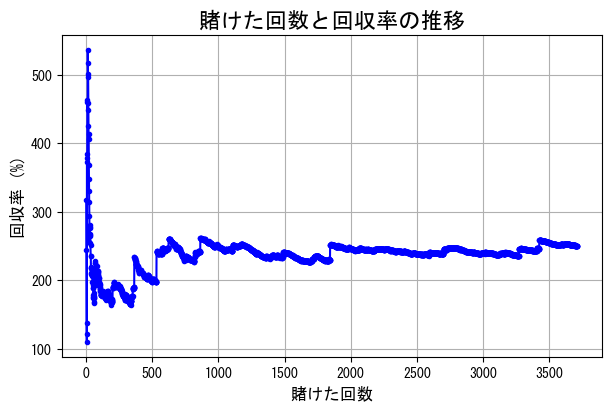

総払い戻し金額: 8793920.0円
賭けた回数: 3711回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,3170.0,1000,1000,3170.0,3.170000,2170.0
1,202201010103,0.0,300,1300,3170.0,2.438462,1870.0
2,202201010104,0.0,1000,2300,3170.0,1.378261,870.0
3,202201010106,0.0,300,2600,3170.0,1.219231,570.0
4,202201010107,0.0,300,2900,3170.0,1.093103,270.0
...,...,...,...,...,...,...,...
3706,202310030712,0.0,100,3518400,8793920.0,2.499409,5275520.0
3707,202310030802,0.0,600,3519000,8793920.0,2.498983,5274920.0
3708,202310030803,0.0,400,3519400,8793920.0,2.498699,5274520.0
3709,202310030807,0.0,2100,3521500,8793920.0,2.497209,5272420.0


In [56]:
xgb.plot_returns_rate(df_22_23)

## Ensamblemodel

In [57]:
df.columns

Index(['race_id', 'horse_id', 'jockey_id', 'trainer_id', 'rank', 'frame',
       'number', 'sex', 'age', 'impost',
       ...
       'jockey_dirt_win_sum_last_two_years',
       'jockey_win_proba_mean_last_two_years',
       'jockey_win_proba_max_last_two_years',
       'jockey_top_2_proba_mean_last_two_years',
       'jockey_top_2_proba_max_last_two_years',
       'jockey_top_3_proba_mean_last_two_years',
       'jockey_top_3_proba_max_last_two_years',
       'jockey_earned_prize_mean_last_two_years',
       'jockey_earned_prize_max_last_two_years',
       'jockey_earned_prize_sum_last_two_years'],
      dtype='object', length=205)

In [58]:
%autoreload

In [ ]:
en = predict.EnsembleModel(
  train_df=df, returns_df=returns, bet_type='sanrenpuku', threshold=0.6, 
  stochastic_variation=False, max_bet=1000, pivot_horse=True, save=True
)
pred_df = en.predict_target(df_22_23)
print(pred_df['predicted_target'].value_counts())



 training... 


Confusion Matrix:
 [[5105 1258]
 [ 905  898]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83      6363
           1       0.42      0.50      0.45      1803

    accuracy                           0.74      8166
   macro avg       0.63      0.65      0.64      8166
weighted avg       0.75      0.74      0.74      8166

Accuracy: 0.7351212343864806
Selected Feature Importance:
                                      feature  importance
80       rank_mean_in_mode_course_len_past_5    0.022941
33                          rank_mean_past_5    0.020655
89      prize_mean_in_mode_course_len_past_5    0.019889
90       prize_sum_in_mode_course_len_past_5    0.018484
43                         prize_mean_past_5    0.017610
84  rank_diff_mean_in_mode_course_len_past_5    0.016392
44                          prize_sum_past_5    0.016162
68              rank_mean_in_mode_course_len    0.014414
17            

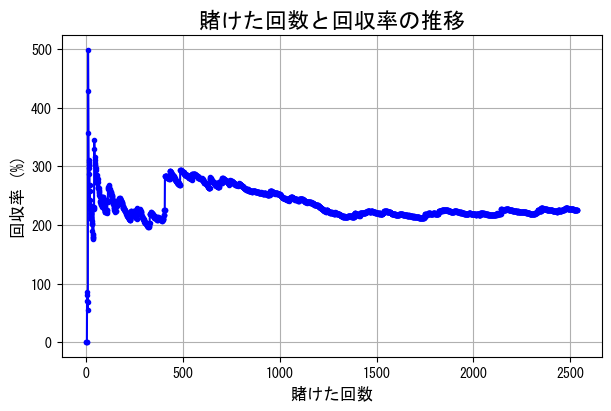

総払い戻し金額: 2076230.0円
賭けた回数: 2535回


,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,0.0,400,400,0.0,0.000000,-400.0
1,202201010104,0.0,100,500,0.0,0.000000,-500.0
2,202201010106,0.0,100,600,0.0,0.000000,-600.0
3,202201010109,0.0,1000,1600,0.0,0.000000,-1600.0
4,202201010110,1700.0,400,2000,1700.0,0.850000,-300.0
...,...,...,...,...,...,...,...
2530,202310030706,0.0,100,923000,2076230.0,2.249437,1153230.0
2531,202310030802,0.0,600,923600,2076230.0,2.247975,1152630.0
2532,202310030803,0.0,100,923700,2076230.0,2.247732,1152530.0
2533,202310030807,0.0,400,924100,2076230.0,2.246759,1152130.0


In [60]:
en.plot_returns_rate(df_22_23)

In [61]:
en_returns = en.calc_returns_rate(df_22_23)

In [62]:
129  / 2566  

0.050272798129384254

In [63]:
en_returns.head(30)

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
0,202201010102,0.0,400,400,0.0,0.000000,-400.0
1,202201010104,0.0,100,500,0.0,0.000000,-500.0
2,202201010106,0.0,100,600,0.0,0.000000,-600.0
3,202201010109,0.0,1000,1600,0.0,0.000000,-1600.0
4,202201010110,1700.0,400,2000,1700.0,0.850000,-300.0
5,202201010112,0.0,100,2100,1700.0,0.809524,-400.0
6,202201010202,0.0,300,2400,1700.0,0.708333,-700.0
7,202201010203,0.0,100,2500,1700.0,0.680000,-800.0
8,202201010204,0.0,600,3100,1700.0,0.548387,-1400.0
9,202201010207,18740.0,1000,4100,20440.0,4.985366,16340.0


In [257]:
en_returns[en_returns['returns'] > 0]

,race_id,returns,bet_sum,total_bet,total_returns,returns_rate,earned
11,202201010207,18740.0,1000,4000,18740.0,4.685000,14740.0
12,202201010210,1360.0,1000,5000,20100.0,4.020000,15100.0
16,202201010307,1960.0,1000,6800,22060.0,3.244118,15260.0
18,202201010310,3040.0,400,7800,25100.0,3.217949,17300.0
25,202201010508,1500.0,300,12200,26600.0,2.180328,14400.0
...,...,...,...,...,...,...,...
2528,202310020603,4070.0,600,931800,2729170.0,2.928923,1797370.0
2531,202310020612,3700.0,100,933500,2732870.0,2.927552,1799370.0
2532,202310030103,700.0,100,933600,2733570.0,2.927988,1799970.0
2546,202310030310,520.0,400,938300,2734090.0,2.913876,1795790.0


In [263]:
pred_df[(pred_df['predicted_target'] == 1) & (pred_df['race_id'] == 202310020603)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
45763,202310020603,4.0,0.793186,1
45767,202310020603,9.0,0.724678,1
45770,202310020603,2.0,0.879804,1
45771,202310020603,1.0,0.916840,1
45772,202310020603,3.0,0.720447,1


In [243]:
pred_df[pred_df['predicted_proba'] >= 0.85][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
21,202201010103,7.0,0.865527,1
40,202201010104,10.0,0.907863,1
60,202201010106,4.0,0.861829,1
66,202201010106,1.0,0.949900,1
160,202201010202,2.0,0.908619,1
...,...,...,...,...
47047,202310030708,2.0,0.895485,1
47116,202310030802,1.0,0.924134,1
47119,202310030802,3.0,0.909992,1
47177,202310030806,15.0,0.851016,1


In [244]:
pred_df[(pred_df['predicted_proba'] >= 0.85) & (pred_df['rank'] == 1)][['race_id', 'rank', 'predicted_proba', 'predicted_target']]

,race_id,rank,predicted_proba,predicted_target
66,202201010106,1.0,0.949900,1
601,202201010503,1.0,0.940648,1
654,202201010507,1.0,0.873339,1
892,202201020101,1.0,0.891271,1
1121,202201020207,1.0,0.859515,1
...,...,...,...,...
46534,202310030408,1.0,0.881263,1
46693,202310030507,1.0,0.899776,1
46789,202310030602,1.0,0.922170,1
46992,202310030704,1.0,0.909107,1


In [242]:
887/2420

0.3665289256198347